In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
dataset = pd.read_csv("DataBaru.csv")

In [25]:
dataset.head()

,Kecamatan,Kode Pos,Gaji,Usia
0,Gajahmungkur,302.0,2500000,20
1,Tembalang,202.0,2000000,21
2,Bawen,NaN,4500000,30
3,Candisari,380.0,5000000,45
4,Genuk,101.0,2500000,39


In [26]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [27]:
print(x)

[[2500000      20]
 [2000000      21]
 [4500000      30]
 [5000000      45]
 [2500000      39]
 [2000000      28]
 [3000000      31]
 [3000000      34]
 [2000000      21]
 [3000000      37]]


In [28]:
print(y)

[20 21 30 45 39 28 31 34 21 37]


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [30]:
print(x_train)

[[3000000      37]
 [2000000      21]
 [3000000      31]
 [3000000      34]
 [5000000      45]
 [2500000      20]
 [2000000      28]]


In [31]:
len(x_train)

7

In [32]:
len(x)

10

In [33]:
len(x_test)

3

In [34]:
len(y_test)

3

In [35]:
len(y_train)

7

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [37]:
print(x_train)

[[ 0.0758098   0.74898799]
 [-0.98552746 -1.20186445]
 [ 0.0758098   0.01741833]
 [ 0.0758098   0.38320316]
 [ 2.19848433  1.72441421]
 [-0.45485883 -1.32379273]
 [-0.98552746 -0.34836651]]


In [38]:
print(x_test)

[[ 1.6678157  -0.10450995]
 [-0.98552746 -1.20186445]
 [-0.45485883  0.99284455]]


In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric= 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred = classifier.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[0 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 1 0 0]]


AttributeError: ignored

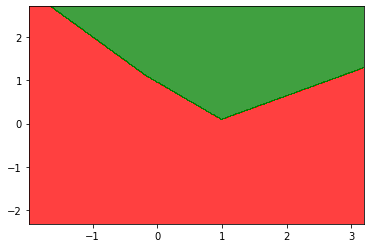

In [42]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train,y_train
x1,x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                    np.arange(start=x_set[:, 1].min()-1,stop=x_set[:, 1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green',)))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(). x2.max())
for i,j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
              c = ListedColorMap(('red','green'))(i),label = j)
  
  plt.title ('Klasifikasi Data dengan K-NN (Data Training)')
  plt.xlabel('Kecamatan')
  plt.xlabel('Gaji')
  plt.legend()
  plt.show()
